<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [31]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [32]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd

Download the webpage at the url


In [33]:
#your code goes here
data  = requests.get(url).text 

Create a soup object


In [34]:
#your code goes here
soup = BeautifulSoup(data,"html.parser") 
html=soup.prettify()
print(html)

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Salary survey results of programming languages
  </title>
  <style>
   table, th, td {
  border: 1px solid black;
}
  </style>
 </head>
 <body>
  <hr/>
  <h2>
   Popular Programming Languages
  </h2>
  <hr/>
  <p>
   Finding out which is the best language is a tough task. A programming language is created to solve a specific problem. A language which is good for task A may not be able to properly handle task B. Comparing programming language is never easy. What we can do, however, is find which is popular in the industry.
  </p>
  <p>
   There are many ways to find the popularity of a programming languages. Counting the number of google searchs for each language is a simple way to find the popularity. GitHub and StackOverflow also can give some good pointers.
  </p>
  <p>
   Salary surveys are a way to find out the programmings languages that are most in demand in the industry. Below table is the result of one such survey. When usin

Scrape the `Language name` and `annual average salary`.


In [35]:
#your code goes here

df=pd.DataFrame(columns=['Language','Average Salary'])

for row in soup.find("tbody").find_all("tr"):
    
  col = row.find_all("td")
  language = col[1].text
  salary = col[3].text
    
  df=df.append({'Language':language,'Average Salary':salary},ignore_index=True)

df.drop(index=df.index[0], axis=0, inplace=True)

print(df)
#Tried to remove the index column but was not successful

      Language Average Salary
1       Python       $114,383
2         Java       $101,013
3            R        $92,037
4   Javascript       $110,981
5        Swift       $130,801
6          C++       $113,865
7           C#        $88,726
8          PHP        $84,727
9          SQL        $84,793
10          Go        $94,082


In [45]:
df['Average Salary']=df['Average Salary'].str.replace(',','')
df

,Language,Average Salary
1,Python,$114383
2,Java,$101013
3,R,$92037
4,Javascript,$110981
5,Swift,$130801
6,C++,$113865
7,C#,$88726
8,PHP,$84727
9,SQL,$84793
10,Go,$94082


In [46]:
df['Average Salary']=df['Average Salary'].str.replace('$','')

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [43]:
# Need to remove "$" and "'"  from the Average Salary Column
#df['Average Salary']=df['Average Salary'].replace('$,','',regex=True)

#Convert the Average Salary to float type from object type
#df['Average Salary']=df['Average Salary'].astype(float)


In [ ]:
df['Average Salary']=df['Average Salary'].astype(int)

In [7]:
#sorting the values in increasing order by Average Salary

df_new = df.sort_values(by=['Average Salary'],as)
df_new

Save the scrapped data into a file named *popular-languages.csv*


In [39]:
# your code goes here

df_new.to_csv('popular-languages.csv')


<function matplotlib.pyplot.show(close=None, block=None)>

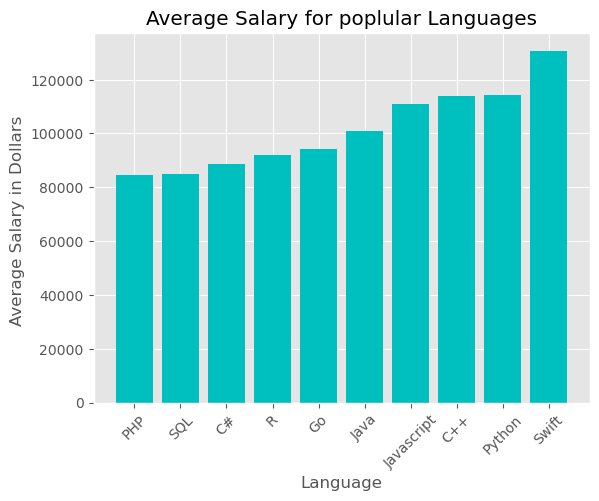

In [43]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use ('ggplot')

# plotting bar graph for Languaage versus Salary
x= df_new['Language']
y=df_new['Average Salary']
c=['red','blue','green','purple','yellow','orange','pink','lightgreen','grey','Magenta']
plt.bar(x,y,color='c')
plt.title("Average Salary for poplular Languages")
plt.xlabel("Language")
plt.ylabel("Average Salary in Dollars ")
plt.xticks(rotation=45)
plt.show


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
